In [1]:
from BioLink.biolink_client import BioLinkWrapper
import pandas as pd
from pprint import pprint
from collections import defaultdict
from mygene import MyGeneInfo

In [2]:
# instantiate helpers
blw = BioLinkWrapper()
mg = MyGeneInfo()

In [3]:
def map_id(in_id):
    return blw.get_obj(obj_id=in_id)['id']

# Workflow 2 
## Fanconi Anemia implementation

## Module declaration

In [4]:
worklow_modules = [
    ('Mod1A', 'Mod1A Functional Similarity'),
    ('Mod1B', 'Mod1B Phenotype Similarity'),
    ('Mod1C', 'Mod1C Coexpression'),
    ('Mod1D', 'Mod1D Gene Chemical Interaction'),
    ('Mod1E', 'Mod1E Gene Interaction'),
    ('Mod3', 'Mod3 Candidate Merging')
]

## Workflow input

# Mod0 Input Lookup
## Get Disease associated genes from BioLink API api.monarchinitative.org

In [5]:
from Modules.Mod0_lookups import LookUp

# workflow input is a disease identifier
lu = LookUp()

Mod O DiseaseGeneLookup metadata:
{'data_type': 'disease',
 'input_type': {'complexity': 'single', 'id_type': ['MONDO', 'DO', 'OMIM']},
 'limit': None,
 'output_type': {'complexity': 'set', 'id_type': 'HGNC'},
 'predicate': 'blm:gene associated with condition',
 'source': 'Monarch Biolink',
 'taxon': 'human'}


In [6]:
input_disease = 'MONDO:0019391' # Fanconi Anemia
input_object = {
    'input': input_disease,
    'parameters': {
        'taxon': 'human',
        'threshold': None,
    },
}
lu.load_input_object(input_object=input_object)
input_object = lu.input_object

{'description': 'Fanconi anemia (FA) is a hereditary DNA repair disorder '
                'characterized by progressive pancytopenia with bone marrow '
                'failure, variable congenital malformations and predisposition '
                'to develop hematological or solid tumors.',
 'id': 'MONDO:0019391',
 'label': 'Fanconi anemia'}


In [7]:
# get genes associated with disease from Biolink
disease_associated_genes = lu.disease_geneset_lookup()
# create list of gene curies for downstream module input
input_curie_set = disease_associated_genes['hit_id'].tolist()
# # show the 
disease_associated_genes

,input_id,input_label,hit_id,hit_label,ncbi,sources
0,MONDO:0019391,Fanconi anemia,HGNC:1100,BRCA1,NCBIGene:672,clinvar
1,MONDO:0019391,Fanconi anemia,HGNC:1101,BRCA2,NCBIGene:675,"orphane, omim, ctd, orphane, clinvar"
2,MONDO:0019391,Fanconi anemia,HGNC:11892,TNF,NCBIGene:7124,ctd
3,MONDO:0019391,Fanconi anemia,HGNC:12829,XRCC2,NCBIGene:7516,"orphane, ctd, omim"
4,MONDO:0019391,Fanconi anemia,HGNC:20473,BRIP1,NCBIGene:83990,"ctd, orphane, omim, ctd, clinvar"
5,MONDO:0019391,Fanconi anemia,HGNC:20748,FANCL,NCBIGene:55120,"ctd, orphane, ctd, omim, clinvar"
6,MONDO:0019391,Fanconi anemia,HGNC:23168,FANCM,NCBIGene:57697,"ctd, orphane"
7,MONDO:0019391,Fanconi anemia,HGNC:23845,SLX4,NCBIGene:84464,"ctd, orphane, ctd, omim, clinvar"
8,MONDO:0019391,Fanconi anemia,HGNC:25009,UBE2T,NCBIGene:29089,"omim, ctd, clinvar, orphane"
9,MONDO:0019391,Fanconi anemia,HGNC:25539,RFWD3,NCBIGene:55159,orphane


In [8]:
from GraphVisuals.graphviz_wrapper import PathGraph

# instantiate workflow graph
path_graph = PathGraph(input_curie=input_object['id'], input_label=input_object['label'])
path_graph.load_nodes(node_list=worklow_modules)

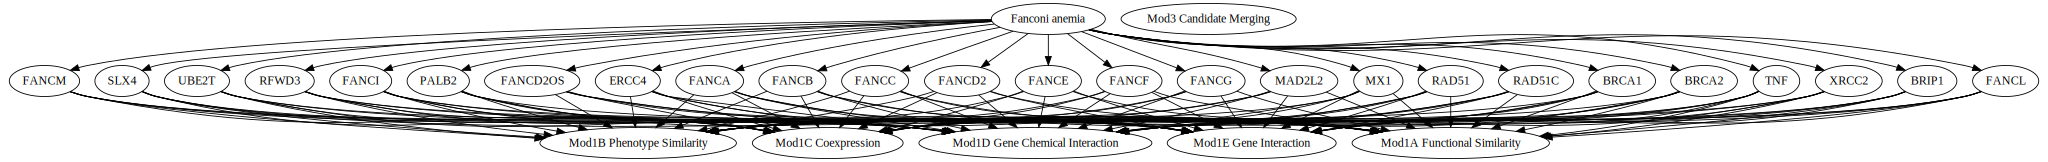

In [9]:
# graph fanconi genes 2 mod1
path_graph.load_nodes(list(zip(disease_associated_genes['hit_id'], disease_associated_genes['hit_label'])))
path_graph.module_outputs(output_gene_set=input_curie_set, module_id=path_graph.conv_pref(input_disease))
for module in worklow_modules[:-1]:
    path_graph.module_inputs(input_gene_set=input_curie_set, module_id=module[0])
path_graph.path_graph

In [10]:
# start a list of final candidates from each module
mod1_candidates = list()

# Mod1A Functional Similarity
## Find similar genes based on GO functional annotations using OntoBio Jaccard similarity

In [11]:
from Modules.Mod1A_functional_sim import FunctionalSimilarity

# Module specification
mod1a_input_object = {
    'input': input_curie_set,
    'parameters': {
        'taxon': 'human',
        'threshold': 0.75,
    },
}
    
func_sim = FunctionalSimilarity()

/Users/tputman/.virtualenvs/modules/lib/python3.6/site-packages/cachier/mongo_core.py:24: UserWarning: Cachier warning: pymongo was not found. MongoDB cores will not work.
  "Cachier warning: pymongo was not found. MongoDB cores will not work.")


Mod1A Functional Similarity metadata:
{'input_type': {'complexity': 'set', 'data_type': 'gene', 'id_type': 'HGNC'},
 'output_type': {'complexity': 'set', 'data_type': 'gene', 'id_type': 'HGNC'},
 'predicate': ['blm:macromolecular machine to biological process association',
               'macromolecular machine to molecular activity association'],
 'source': 'Monarch Biolink'}


In [12]:
mod1a_input_object = {
    'input': input_curie_set,
    'parameters': {
        'taxon': 'human',
        'threshold': 0.75,
    },
}
func_sim.load_input_object(mod1a_input_object)
func_sim.load_gene_set() 
func_sim.load_associations() 

In [13]:
Mod1A_results = pd.DataFrame(func_sim.compute_similarity())  
Mod1A_results = Mod1A_results[~Mod1A_results['sim_hit_name'].isin(disease_associated_genes['hit_label'])]

In [14]:
Mod1A_results.head()

,input_curie,sim_hit_curie,sim_hit_name,sim_score
8,UniProtKB:Q8IY92,UniProtKB:Q9BQ83,SLX1A,0.760638
15,UniProtKB:Q8NB91,UniProtKB:Q0VG06,FAAP100,0.810345
17,UniProtKB:Q8NB91,UniProtKB:Q9BTP7,FAAP24,0.903846
20,UniProtKB:Q8NB91,UniProtKB:Q9NRY2,INIP,0.862745
23,UniProtKB:Q9HB96,UniProtKB:Q0VG06,FAAP100,0.775862


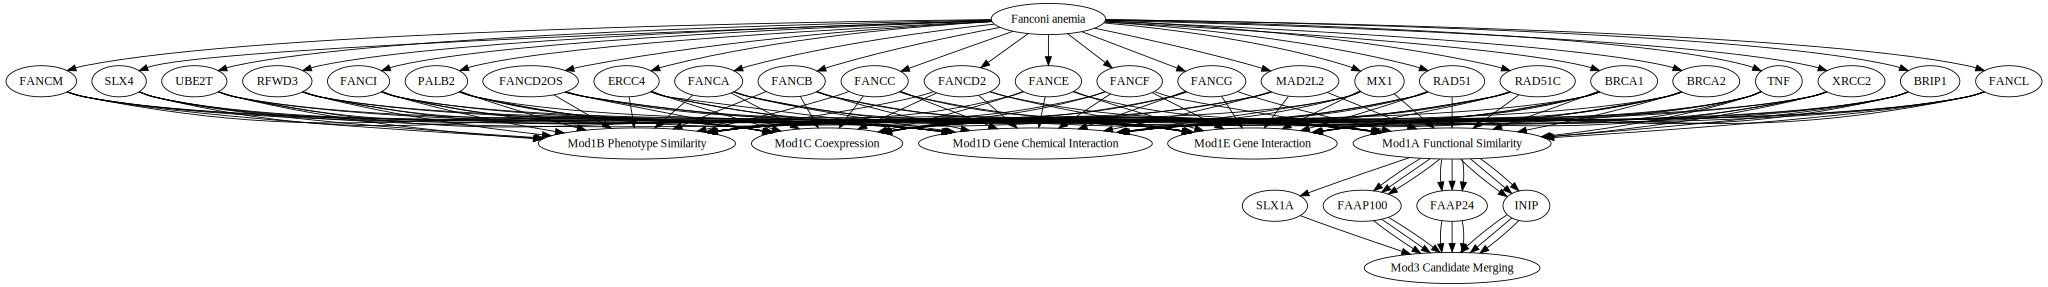

In [15]:
# graph mod1A genes 2 Mod3
for index, row in Mod1A_results.iterrows():
    mod1_candidates.append({
        'input_curie': row[0],
        'output_curie': row[1],
        'output_name': row[2],
        'module': 'Mod1A',
        'score': row[3],
    }) 
path_graph.load_nodes(list(zip(Mod1A_results['sim_hit_curie'][:10], Mod1A_results['sim_hit_name'][:10])))
path_graph.module_inputs(input_gene_set=Mod1A_results['sim_hit_curie'].tolist()[:10], module_id='Mod3')
path_graph.module_outputs(output_gene_set=Mod1A_results['sim_hit_curie'].tolist()[:10], module_id='Mod1A')
path_graph.path_graph

# Mod1B Phenotype Similarity
## Find similar genes based on OwlSim calculated Phenotype Similarity

In [16]:
from Modules.Mod1B1_phenotype_similarity import PhenotypeSimilarity

# Module specification
pheno_sim = PhenotypeSimilarity()

Mod1B Phenotype Similarity metadata:
{'input_type': {'complexity': 'set', 'data_type': 'gene', 'id_type': 'HGNC'},
 'output_type': {'complexity': 'set', 'data_type': 'gene', 'id_type': 'HGNC'},
 'predicate': ['blm:has phenotype'],
 'source': 'Monarch Biolink'}


In [17]:
mod1b_input_object = {
    'input': input_curie_set,
     'parameters': {
        'taxon': 'human',
        'threshold': .50,
    },
}
pheno_sim.load_input_object(mod1b_input_object)
pheno_sim.load_gene_set()
pheno_sim.load_associations()

In [18]:
# compute phenotype similarity
Mod1B_results = pd.DataFrame(pheno_sim.compute_similarity())

In [19]:
def sum_scores(score_list):
    return sum(map(float,score_list))

Mod1B_results = Mod1B_results[~Mod1B_results['sim_hit_name'].isin(disease_associated_genes['hit_label'])]
groupedMod1B_results = Mod1B_results.groupby(['sim_hit_curie', 'sim_hit_name'])['sim_score'].apply(sum_scores).reset_index()
Mod1B_merged = pd.merge(groupedMod1B_results, 
         Mod1B_results.groupby(['sim_hit_curie'])['input_curie'].apply(', '.join).reset_index(),
        on='sim_hit_curie').sort_values(['sim_score'], ascending=False).reset_index()
Mod1B_merged.head(10)

,index,sim_hit_curie,sim_hit_name,sim_score,input_curie
0,0,HGNC:17271,RRAS2,1.011349,"HGNC:20473, HGNC:26144"
1,2,HGNC:7499,MT-TT,1.011349,"HGNC:20473, HGNC:26144"
2,3,HGNC:8143,OPCML,1.011349,"HGNC:20473, HGNC:26144"
3,1,HGNC:6709,LTA,0.967532,HGNC:11892


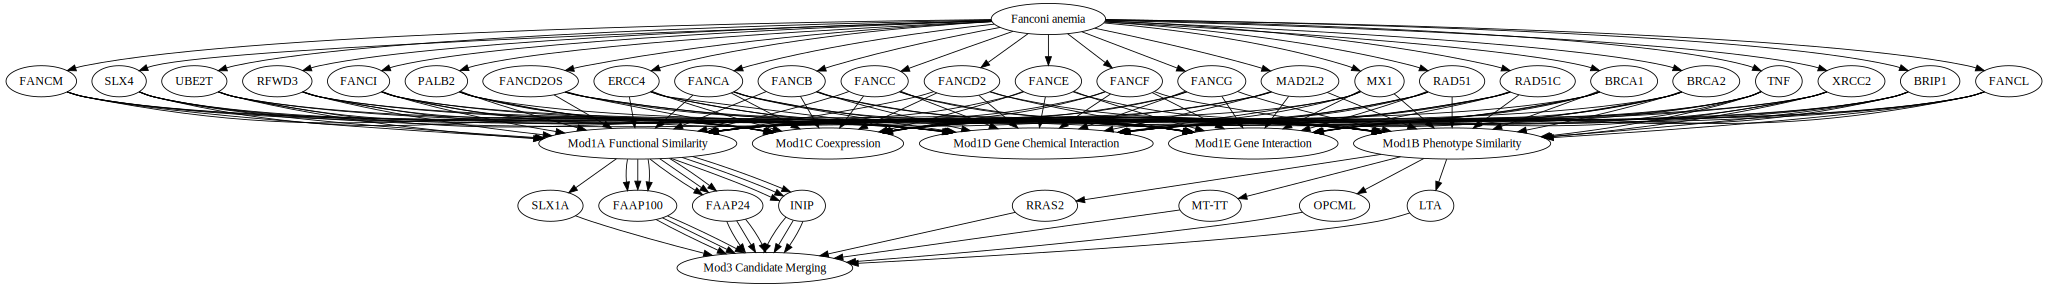

In [20]:
# graph mod1B genes 2 Mod3
for index, row in Mod1B_results.iterrows():
    mod1_candidates.append({
        'input_curie': row[-1],
        'output_curie': row[0],
        'output_name': row[1],
        'module': 'Mod1B',
        'score': row[2]
    }) 
path_graph.load_nodes(list(zip(Mod1B_merged['sim_hit_curie'][:10], Mod1B_merged['sim_hit_name'][:10])))
path_graph.module_outputs(output_gene_set=Mod1B_merged['sim_hit_curie'].tolist()[:10], module_id='Mod1B')
path_graph.module_inputs(input_gene_set=Mod1B_merged['sim_hit_curie'].tolist()[:10], module_id='Mod3')
path_graph.path_graph

# Mod1C Coexpression

In [21]:
# TODO

# Mod1D Chemical Gene Interactions

In [22]:
# TODO

# Mod1E Gene Interactions

In [23]:
from Modules.Mod1E_interactions import GeneInteractions
gene_inter = GeneInteractions()

Mod1E Interaction Network metadata:
{'input_type': {'complexity': 'set', 'data_type': 'gene', 'id_type': 'HGNC'},
 'output_type': {'complexity': 'set', 'data_type': 'gene', 'id_type': 'HGNC'},
 'predicate': ['blm:interacts with'],
 'source': 'Monarch Biolink'}


In [24]:
mod1e_input_object = {
    'input': input_curie_set,
     'parameters': {
        'taxon': 'human',
        'threshold': None,
    },
}
gene_inter.load_input_object(input_object=mod1e_input_object)
gene_inter.load_gene_set()

In [25]:
gene_inter.get_interactions()

In [26]:
Mod1E_results = pd.DataFrame(gene_inter.interactions)
Mod1E_results = Mod1E_results[~Mod1E_results['hit_label'].isin(disease_associated_genes['hit_label'])]
grouped_Mod1E_results = Mod1E_results.groupby(['hit_id','hit_label'])['input_id'].apply(', '.join).reset_index()
trimmed_Mod1E_results = list()
for index, row in grouped_Mod1E_results.iterrows():
    if len(row[-1].split(',')) > 8:
        trimmed_Mod1E_results.append(row)
Mod1E_results = pd.DataFrame(trimmed_Mod1E_results, columns=['hit_id', 'hit_label', 'input_id']).reset_index()
Mod1E_results

,index,hit_id,hit_label,input_id
0,7,HGNC:10289,RPA1,"HGNC:1101, HGNC:12829, HGNC:20748, HGNC:23168,..."
1,8,HGNC:10290,RPA2,"HGNC:1100, HGNC:1101, HGNC:12829, HGNC:20473, ..."
2,9,HGNC:10291,RPA3,"HGNC:1101, HGNC:12829, HGNC:20473, HGNC:20748,..."
3,14,HGNC:10417,RPS27A,"HGNC:1101, HGNC:12829, HGNC:20473, HGNC:20748,..."
4,22,HGNC:1058,BLM,"HGNC:1101, HGNC:12829, HGNC:20473, HGNC:20748,..."
5,62,HGNC:11422,CENPX,"HGNC:20748, HGNC:23168, HGNC:23845, HGNC:25009..."
6,101,HGNC:11992,TOP3A,"HGNC:1101, HGNC:12829, HGNC:20473, HGNC:20748,..."
7,120,HGNC:12458,UBA52,"HGNC:12829, HGNC:20473, HGNC:20748, HGNC:23168..."
8,121,HGNC:12463,UBB,"HGNC:12829, HGNC:20473, HGNC:20748, HGNC:23845..."
9,122,HGNC:12468,UBC,"HGNC:1101, HGNC:12829, HGNC:20748, HGNC:23845,..."


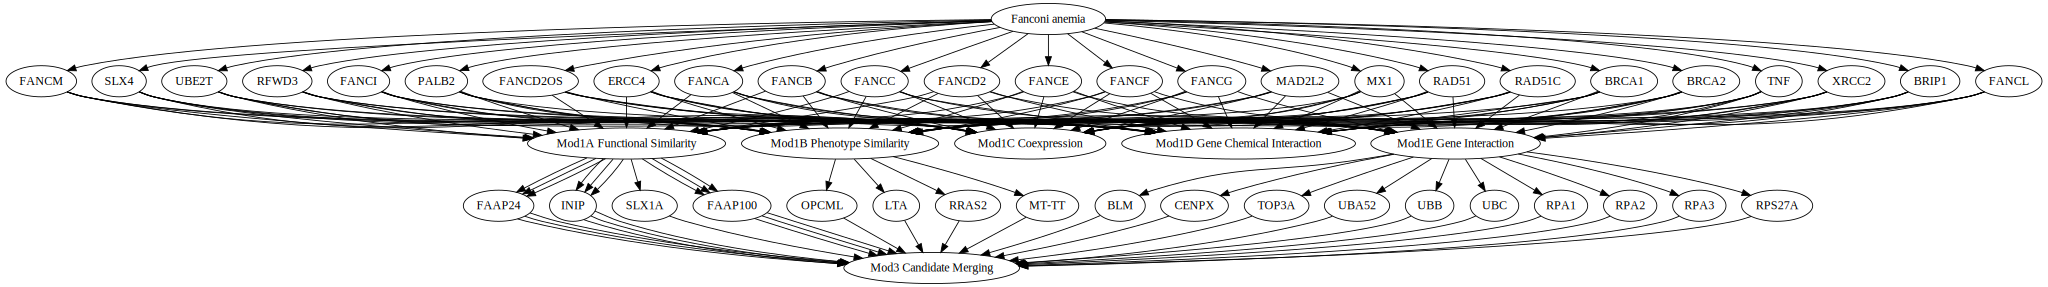

In [27]:
# graph mod1E genes 2 Mod3
for index, row in Mod1E_results.iterrows():
    mod1_candidates.append({
        'input_curie': row[-1],
        'output_curie': row[0],
        'output_name': row[1],
        'module': 'Mod1E',
        'score': None
    })

path_graph.load_nodes(list(zip(Mod1E_results['hit_id'], Mod1E_results['hit_label']))[:10])
path_graph.module_outputs(output_gene_set=Mod1E_results['hit_id'].tolist()[:10], module_id='Mod1E')
path_graph.module_inputs(input_gene_set=Mod1E_results['hit_id'].tolist()[:10], module_id='Mod3')
path_graph.path_graph

In [28]:
candidates_df = pd.DataFrame(mod1_candidates)

In [29]:
candidates_df

,input_curie,module,output_curie,output_name,score
0,UniProtKB:Q8IY92,Mod1A,UniProtKB:Q9BQ83,SLX1A,0.760638
1,UniProtKB:Q8NB91,Mod1A,UniProtKB:Q0VG06,FAAP100,0.810345
2,UniProtKB:Q8NB91,Mod1A,UniProtKB:Q9BTP7,FAAP24,0.903846
3,UniProtKB:Q8NB91,Mod1A,UniProtKB:Q9NRY2,INIP,0.862745
4,UniProtKB:Q9HB96,Mod1A,UniProtKB:Q0VG06,FAAP100,0.775862
5,UniProtKB:Q9HB96,Mod1A,UniProtKB:Q9BTP7,FAAP24,0.865385
6,UniProtKB:Q9HB96,Mod1A,UniProtKB:Q9NRY2,INIP,0.823529
7,UniProtKB:Q9NPI8,Mod1A,UniProtKB:Q0VG06,FAAP100,0.810345
8,UniProtKB:Q9NPI8,Mod1A,UniProtKB:Q9BTP7,FAAP24,0.903846
9,UniProtKB:Q9NPI8,Mod1A,UniProtKB:Q9NRY2,INIP,0.862745


In [30]:
candidates_df.groupby(['output_name'])['module'].apply(', '.join).reset_index()

,output_name,module
0,FAAP100,"Mod1A, Mod1A, Mod1A"
1,FAAP24,"Mod1A, Mod1A, Mod1A"
2,HGNC:10289,Mod1E
3,HGNC:10290,Mod1E
4,HGNC:10291,Mod1E
5,HGNC:10417,Mod1E
6,HGNC:1058,Mod1E
7,HGNC:11422,Mod1E
8,HGNC:11992,Mod1E
9,HGNC:12458,Mod1E
